In [1]:
import sys, os
clones_path = os.path.abspath('..')
if clones_path not in sys.path:
    sys.path.insert(0, clones_path)
    
import numpy as np
import matplotlib.pyplot as plt
from growth.sweep.sweep import Sweep
from clones.annotation.validation.benchmark import Benchmark

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
sweep_path = '../../growth/simulations/Sweep_181121_235632/'
sweep = Sweep.load(sweep_path)

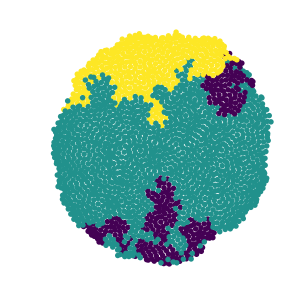

In [3]:
simulation_id = 160
simulation = sweep[simulation_id]
simulation.plot()

In [12]:
scale = 4

# measure culture
measurements = simulation.measure(scale=scale)

# perform benchmark annotation
benchmark = Benchmark(measurements, q=95, rule='weighted', twolevel=True)

# print results
simple_score = benchmark.scores['simple']
community_score = benchmark.scores['community']
print('SIMPLE MAE {:0.3f}'.format(simple_score.MAE))
print('COMMUNITY MAE {:0.3f}'.format(community_score.MAE))

SIMPLE MAE 0.087
COMMUNITY MAE 0.058


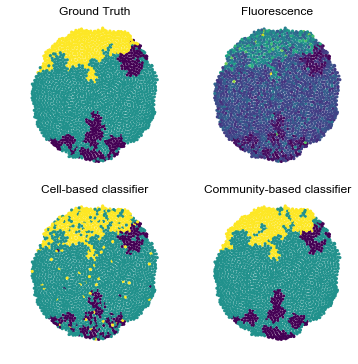

In [13]:
benchmark.show()

In [18]:
"""
3. run in large batch
"""

'\n2. add revised "edge distance threshold"\n3. run in large batch\n'

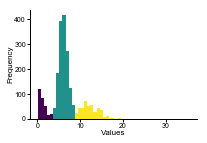

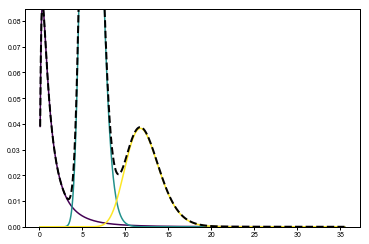

In [19]:
benchmark.cell_classifier.show()
benchmark.cell_classifier.show_pdf()

In [146]:
from pomegranate import GeneralMixtureModel

In [45]:
edge_weights = benchmark.annotator.graph.evaluate_edge_weights()

In [5]:
simple = []
community = []

for _ in range(10):
    measurements = simulation.measure(scale=scale)
    benchmark = Benchmark(measurements)
    simple_score = benchmark.scores['simple']
    simple.append(simple_score.MAE)
    community_score = benchmark.scores['community']
    community.append(community_score.MAE)
    

In [6]:
simple

[0.043343542178133763,
 0.04664523388879984,
 0.04337249021303249,
 0.03600333681736853,
 0.04390299095757571,
 0.04307228536641849,
 0.037535642587061165,
 0.045581094035104096,
 0.0486511864504817,
 0.043430650566165484]

In [37]:
community

[0.18344642647716272,
 0.11560908680279659,
 0.10176016598461202,
 0.11618129180673854,
 0.15830754912241687,
 0.20753279202171268,
 0.1265080128911437,
 0.1899521222251744,
 0.2122455815450812,
 0.24571590425771986]

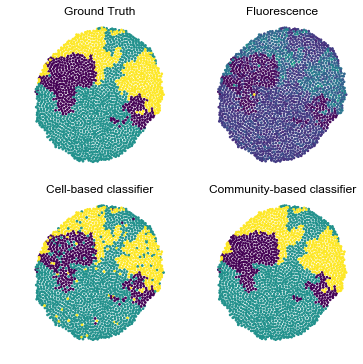

In [68]:
benchmark.show()

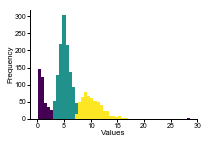

In [69]:
benchmark.cell_classifier.show()

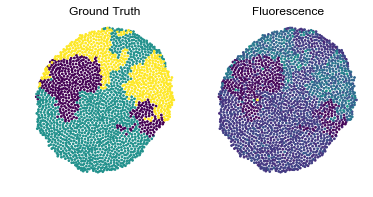

In [70]:
benchmark.show_measurements()

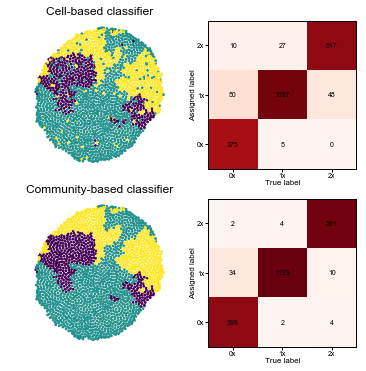

In [71]:
benchmark.show_comparison(text='counts')

In [115]:
scoring = benchmark.scores['community']

In [119]:
scoring.data.difference.sum() / (2*len(scoring.data))

0.0006986492780624127

In [130]:
scoring.data.difference.sum() / (scoring.n*2)

0.0006986492780624127

In [129]:
from sklearn.metrics import f1_score

score = f1_score(*scoring.data[['measured', 'predicted']].values.T, average='weighted')
score


0.9986033354930225

In [49]:
ls

annotation.ipynb               fluorescence_models.ipynb
bleedthrough_correction.ipynb  segmentation.ipynb
classification.ipynb           selection.ipynb
comparison.ipynb               synthetic_annotation.ipynb


In [5]:
edges = benchmark.annotator.graph.build_links()

In [6]:
from clones.spatial.infomap import InfoMap

In [7]:
infomap = InfoMap(edges)

In [8]:
import infomap

In [ ]:
# instantiate infomap
infomap_obj = infomap.Infomap("--multilevel --undirected")
network = infomap_obj.network()

# add edges
_ = [network.addLink(*e) for e in edges]

# run
infomap_obj.run()

In [12]:
for node in infomap_obj.iterTree():
    if node.isLeaf():
    

B
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
B
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
B
A
A
A
A
A
A
B
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A


In [ ]:
def build_classifier(self):
    """
    Construct node to module classifier.

    Returns:

        node_to_module (dict) - {node: module} pairs

        classifier (vectorized func) - maps nodes to modules

    """
    node_to_module = {}
    for node in self.infomap.iterTree():
        if node.isLeaf():
            node_to_module[node.physicalId] = node.moduleIndex()
    return node_to_module, np.vectorize(node_to_module.get)